First Task

My first task is to simulate a random walk in n steps, with 
$$ n = 2^k $$
where k is the "size" of the simulation, or the "time" of the random walk.


--- 0.014000654220581055 seconds ---


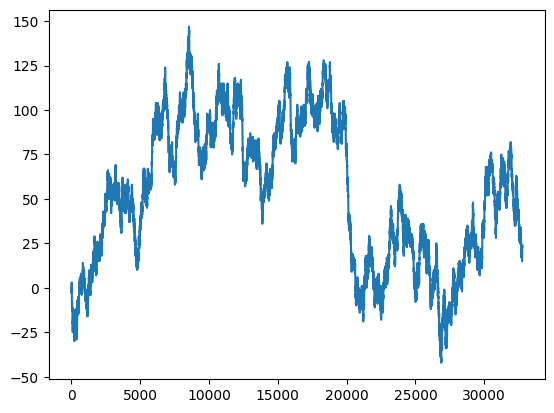

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics 
import time

# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
start_time = time.time()

seed(2024)
size = 15
# simulation of random walk
n=pow(2,size)
x = [0]*n

for i in range(1,n):
    
    if random()> 0.5:
        x[i]=x[i-1]+1
    else:
        x[i]=x[i-1]-1

print("--- %s seconds ---" % (time.time() - start_time))
plt.plot(x)
plt.show()

For the second part:
- We plan to show that the standard deviation of the random walk grows as square-root of the time;
- break time into a geometrically growing sequence: 32, 64, 128, 256... We will call each of these times a "bin";
- for each bin (say with time = t), simulate a large number of random walks with that size, only focussing on the last point (X_t);
- estimate the standard deviation of X_t for each bin;
- plot the logarithm of the standard deviation as a function of the logarithm of time (use standard variation bars);
- use a linear regression to estimate how the standard deviation grows as a function of time;
- obtain the diffusion coefficient as the slope of the line.


0.4785615763231878
[0.68003433 0.93085162 1.09836234 1.21589827 1.31838404 1.38341452
 1.44137467 1.47054653 1.492731   1.52400563 1.55827487 1.55082364
 1.56147476]


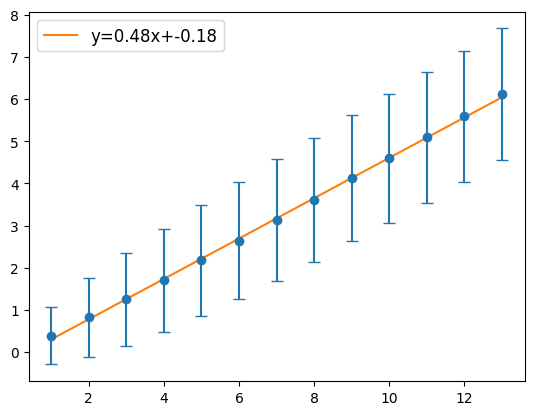

--- 99.20267415046692 seconds ---


In [10]:
start_time = time.time()

seed(-12)
size = 15
numbsimul = 16000
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.log(np.abs(A))/np.log(2)
stdA = absA.std(1)
meanA = absA.mean(1)
p = np.polyfit(Size,meanA,1)
print(p[0])
print(stdA)
plt.errorbar(Size,meanA,stdA, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p[1]+p[0]*Size, label='y={:.2f}x+{:.2f}'.format(p[0],p[1]))
plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


For purpose of experimentation I also tried to see what happens when simmulate only for the k above a number and also for only times (k), perhaps the better choice of two times is take powers of 2.

0.5526163800834168
[1.3102649  1.37509405 1.42356993 1.45849535 1.50883243 1.53188517
 1.54624729 1.57051454 1.58407562 1.57901649]
--- 384.9941146373749 seconds ---


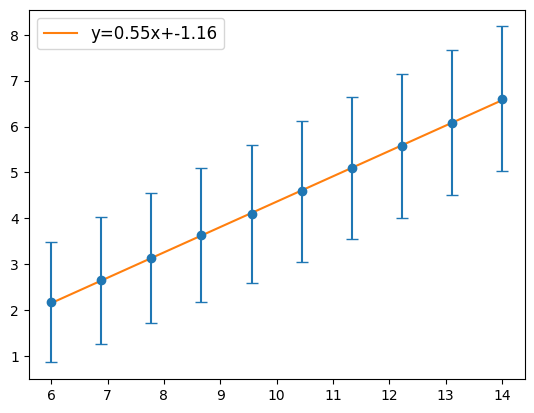

In [11]:
start_time = time.time()

seed(1)
size = 16
start = 6
numbsimul = 32000
Size = np.linspace(start,size-2, size-start)

A = np.zeros((size - start,numbsimul -1))

# simulations of random walks
for k in range(start,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-start][j-1] = x

# calculating the linear regression of log map
absA = np.log(np.abs(A))/np.log(2)
stdA = absA.std(1)
meanA = absA.mean(1)
p = np.polyfit(Size,meanA,1)
print(p[0])
print(stdA)
print("--- %s seconds ---" % (time.time() - start_time))

plt.errorbar(Size,meanA,stdA, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p[1]+p[0]*Size, label='y={:.2f}x+{:.2f}'.format(p[0],p[1]))
plt.legend(fontsize=12)
plt.show()

0.4951612530970273
[1.4271078  1.58145216]
--- 793.2752342224121 seconds ---


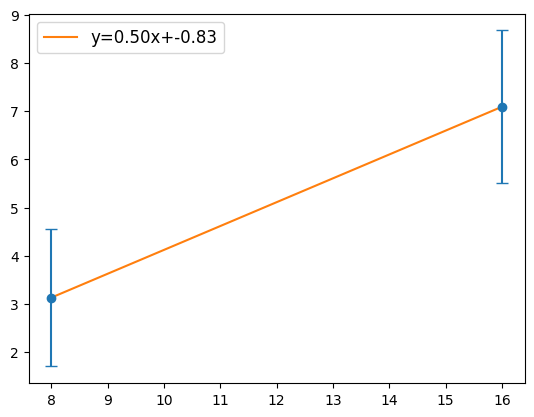

In [12]:
start_time = time.time()

seed(8)
point2 = 16
point1 = 8
numbsimul = 64000
Size = np.linspace(point1,point2, 2)

A = np.zeros((2,numbsimul -1))

# simulations of random walks
for k in Size:
    n=int(pow(2,k))
    if k==point1:
        l=0
    if k==point2:
        l=1

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
        A[l][j-1]=x
# calculating the linear regression of log map
absA = np.log(np.abs(A))/np.log(2)
stdA = absA.std(1)
meanA = absA.mean(1)
p = np.polyfit(Size,meanA,1)
print(p[0])
print(stdA)
print("--- %s seconds ---" % (time.time() - start_time))
plt.errorbar(Size,meanA,stdA, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p[1]+p[0]*Size, label='y={:.2f}x+{:.2f}'.format(p[0],p[1]))
plt.legend(fontsize=12)
plt.show()